# Haberman Cancer Survival dataset

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


'''downlaod haberman.csv from https://www.kaggle.com/gilsousa/habermans-survival-data-set'''
#Load haberman.csv into a pandas dataFrame.
#haberman = pd.read_csv("haberman.csv", header=None, names=['age', 'year_of_operation', 'positive_axillary_nodes', 'survival_status_after_5_years'])

In [38]:
haberman = pd.read_csv("haberman.csv")
haberman.columns = ['age', 'year_of_operation', 'positive_axillary_nodes', 'survival_status_after_5_years']

In [39]:
haberman.head()

,age,year_of_operation,positive_axillary_nodes,survival_status_after_5_years
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [40]:
haberman.shape

(306, 4)

In haberman dataset, total observation is 305 and total number of variable is 4.

In [41]:
print(haberman.columns)

Index(['age', 'year_of_operation', 'positive_axillary_nodes',
       'survival_status_after_5_years'],
      dtype='object')


In [42]:
print(haberman.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age                              306 non-null int64
year_of_operation                306 non-null int64
positive_axillary_nodes          306 non-null int64
survival_status_after_5_years    306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB
None


All variable is integer type except variable name "survival_status_after_5_years" which is  class type variable.

there is no missing value.

In [43]:
print(haberman["survival_status_after_5_years"].value_counts(normalize = True))
print("*"*50)


1    0.735294
2    0.264706
Name: survival_status_after_5_years, dtype: float64
**************************************************


So the haberman dataset is imbalence dataset which have 224 observation in class 1 and only 81 observation in class 2. 73% survived after 5 year treatment.

the variable survival_status_after_5_years is integer type so it should be converted into categorical variable.

it is very good to conver binary categorical variable into yes or no.

In [44]:
haberman['survival_status_after_5_years'] = haberman['survival_status_after_5_years'].map({1:"yes", 2:"no"})
haberman['survival_status_after_5_years'] = haberman['survival_status_after_5_years'].astype('category')
print(haberman.head())

   age  year_of_operation  positive_axillary_nodes  \
0   30                 64                        1   
1   30                 62                        3   
2   30                 65                        0   
3   31                 59                        2   
4   31                 65                        4   

  survival_status_after_5_years  
0                           yes  
1                           yes  
2                           yes  
3                           yes  
4                           yes  


# 2-D plotting

C:\Users\Raftaar Singh\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


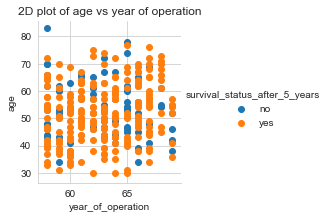

In [45]:
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="survival_status_after_5_years", size=3) \
   .map(plt.scatter, "year_of_operation", "age") \
   .add_legend();
plt.title('2D plot of age vs year of operation')
plt.show();

Observation:
    it is not possible to differentiate the survival states with these variable because there is no patteren

# High level statistics

In [46]:
print(haberman.describe())

              age  year_of_operation  positive_axillary_nodes
count  306.000000         306.000000               306.000000
mean    52.457516          62.852941                 4.026144
std     10.803452           3.249405                 7.189654
min     30.000000          58.000000                 0.000000
25%     44.000000          60.000000                 0.000000
50%     52.000000          63.000000                 1.000000
75%     60.750000          65.750000                 4.000000
max     83.000000          69.000000                52.000000


Observation:

Age of patient varies from 30 to 83 with mean age of 52.

25% of patient having NO positive_axillary_nodes.

Although maximum value of positive_axillary_nodes is 52, 75% have less than 4 positive_axillary_nodes.

Year of treatment of cancer from 58 to 69 with mean value of 63 year.


In [47]:
import numpy as np
haberman_yes = haberman.loc[haberman["survival_status_after_5_years"] == "yes"];
haberman_no = haberman.loc[haberman["survival_status_after_5_years"] == "no"];

Observation:

From pair plot, it is not seen any variable important in classification so here I sagerate dataset into two class (yes,no)

In [48]:
#Mean 
print("Means:")
print(np.mean(haberman_yes["age"]))
print(np.mean(haberman_yes["year_of_operation"]))
print(np.mean(haberman_yes["positive_axillary_nodes"]))
print("*"*50)
print(np.mean(haberman_no["age"]))
print(np.mean(haberman_no["year_of_operation"]))
print(np.mean(haberman_no["positive_axillary_nodes"]))

Means:
52.01777777777778
62.86222222222222
2.7911111111111113
**************************************************
53.67901234567901
62.82716049382716
7.45679012345679


Observation:

Mean of age and year of operation variable nearly same in both category.

Mean of positive_axillary_nodes variable in "NO" category is higher than category "YES".

High mean value positive_axillary_nodes have less chance of survival after 5 year.

In [49]:
#Variance, Std-deviation
print("\nStd-dev:");
print(np.std(haberman_yes["age"]))
print(np.std(haberman_yes["year_of_operation"]))
print(np.std(haberman_yes["positive_axillary_nodes"]))
print("*"*50)
print(np.std(haberman_no["age"]))
print(np.std(haberman_no["year_of_operation"]))
print(np.std(haberman_no["positive_axillary_nodes"]))


Std-dev:
10.98765547510051
3.2157452144021956
5.857258449412131
**************************************************
10.10418219303131
3.3214236255207883
9.128776076761632


Observation:

A gain spreadness of both category same for all variable except positive_axillary_nodes variable.

High spread value of positive_axillary_nodes variable have less chance of survival after 5 year.

In [16]:
#Median, Percentile, Quantile, IQR, MAD

# Objective: To predict patient survival after 5 year treatment based on age, year_of_operation, and positive_axillary_nodes

### Univariate analysis(Histogram, PDF, CDF)

Draw pdf of each variable

C:\Users\Raftaar Singh\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


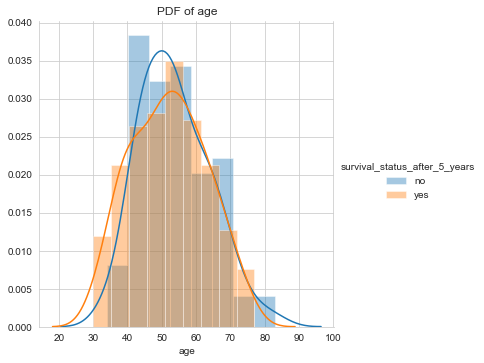

In [51]:
#PDF of age
sns.FacetGrid(haberman, hue="survival_status_after_5_years", size=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.title('PDF of age')
plt.show();

Observation:

PDF of age nearly same for both class variable in range from 30-80.

C:\Users\Raftaar Singh\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


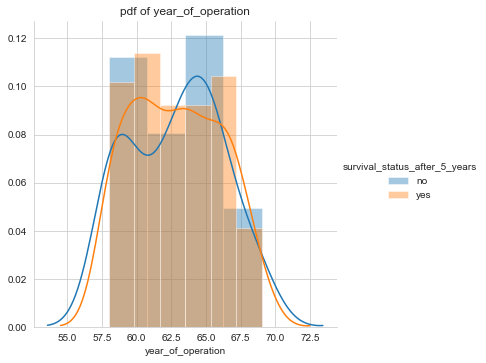

In [52]:
#pdf of year_of_operation
#PDF of age
sns.FacetGrid(haberman, hue="survival_status_after_5_years", size=5) \
   .map(sns.distplot, "year_of_operation") \
   .add_legend();
plt.title('pdf of year_of_operation')
plt.show();

PDF of year_of_treatment nearly same for both class variable in range from 58-69.

C:\Users\Raftaar Singh\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


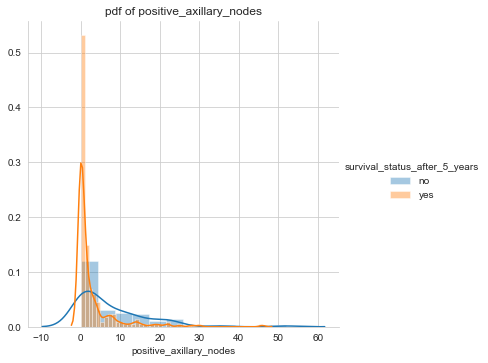

In [53]:
#pdf of positive_axillary_nodes
#PDF of age
sns.FacetGrid(haberman, hue="survival_status_after_5_years", size=5) \
   .map(sns.distplot, "positive_axillary_nodes") \
   .add_legend();
plt.title('pdf of positive_axillary_nodes')
plt.show();

Positive_axillary_nodes of most of survival after 5 year lie in range from 0-5.

Draw CDF of each variable

[0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]
[30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]


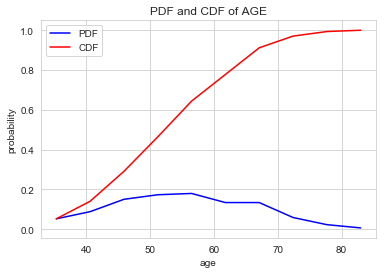

In [55]:
#------Plot CDF of age

counts, bin_edges = np.histogram(haberman['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,'-b', label='PDF')
plt.plot(bin_edges[1:], cdf,'-r', label='CDF')
plt.legend(loc='upper left')
plt.title('PDF and CDF of AGE')
plt.xlabel('age')
plt.ylabel('probability')
plt.show();

Observation:
    all people have age less then 80 year but majority of them lie between 40 to 60 year.

[0.20588235 0.09150327 0.08496732 0.0751634  0.09803922 0.10130719
 0.09150327 0.09150327 0.08169935 0.07843137]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


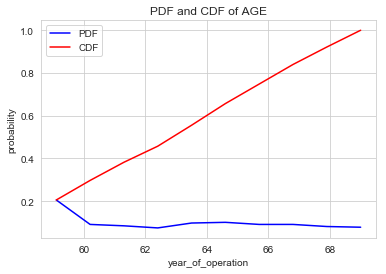

In [56]:
#------Plot CDF of year_of_operation

counts, bin_edges = np.histogram(haberman['year_of_operation'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,'-b', label='PDF')
plt.plot(bin_edges[1:], cdf,'-r', label='CDF')
plt.legend(loc='upper left')
plt.title('PDF and CDF of AGE')
plt.xlabel('year_of_operation')
plt.ylabel('probability')
plt.show();

Observation: almost operation was done for all age of groups but maximum were less than 60 year.

[0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


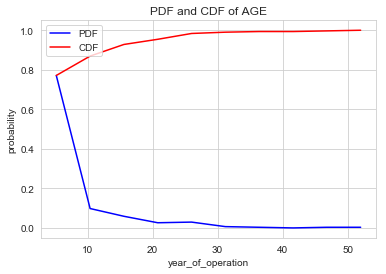

In [57]:
#------Plot CDF of positive_axillary_nodes

counts, bin_edges = np.histogram(haberman['positive_axillary_nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,'-b', label='PDF')
plt.plot(bin_edges[1:], cdf,'-r', label='CDF')
plt.legend(loc='upper left')
plt.title('PDF and CDF of AGE')
plt.xlabel('year_of_operation')
plt.ylabel('probability')
plt.show();

Around 80% patient have positive_axillary_nodes less than or equal to 5.

### Box plot and Whiskers

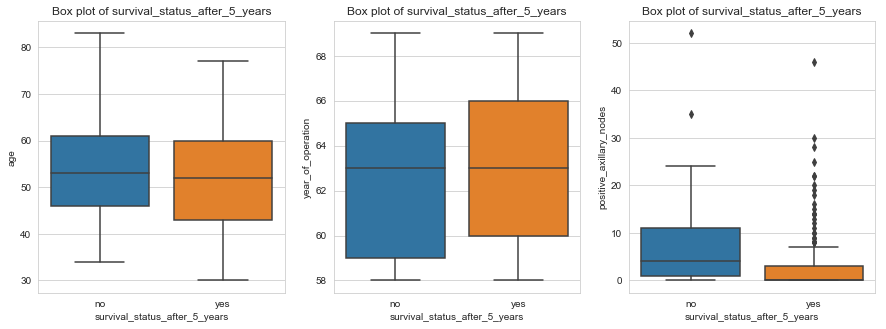

In [66]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for ix, feature in enumerate(list(haberman.columns)[:-1]):
    sns.boxplot( x='survival_status_after_5_years', y=feature, data=haberman, ax=axes[ix]).set_title("Box plot of survival_status_after_5_years")
#plt.title('Box plot of survival_status_after_5_years')
plt.show()  

### Violin plots

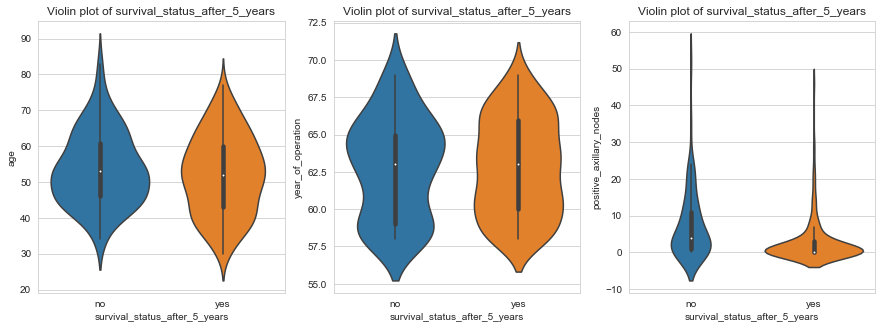

In [65]:
#Violin plot is the combination of box plot and probability density function.
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for ix, feature in enumerate(list(haberman.columns)[:-1]):
    sns.violinplot( x='survival_status_after_5_years', y=feature, data=haberman, ax=axes[ix]).set_title("Violin plot of survival_status_after_5_years")
#plt.title('Violin plot of survival_status_after_5_years')
plt.show()

Observation:

Patient treated after 1965 have high chance of survive that of rest. patient treated before 1960 have lower chance of survive that of rest.

positive_axillary_nodes can make better seperation between two class.

Year_of_operation upto some extent make better seperation between two class

# Multivariate Analysis

### pair-plot

C:\Users\Raftaar Singh\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


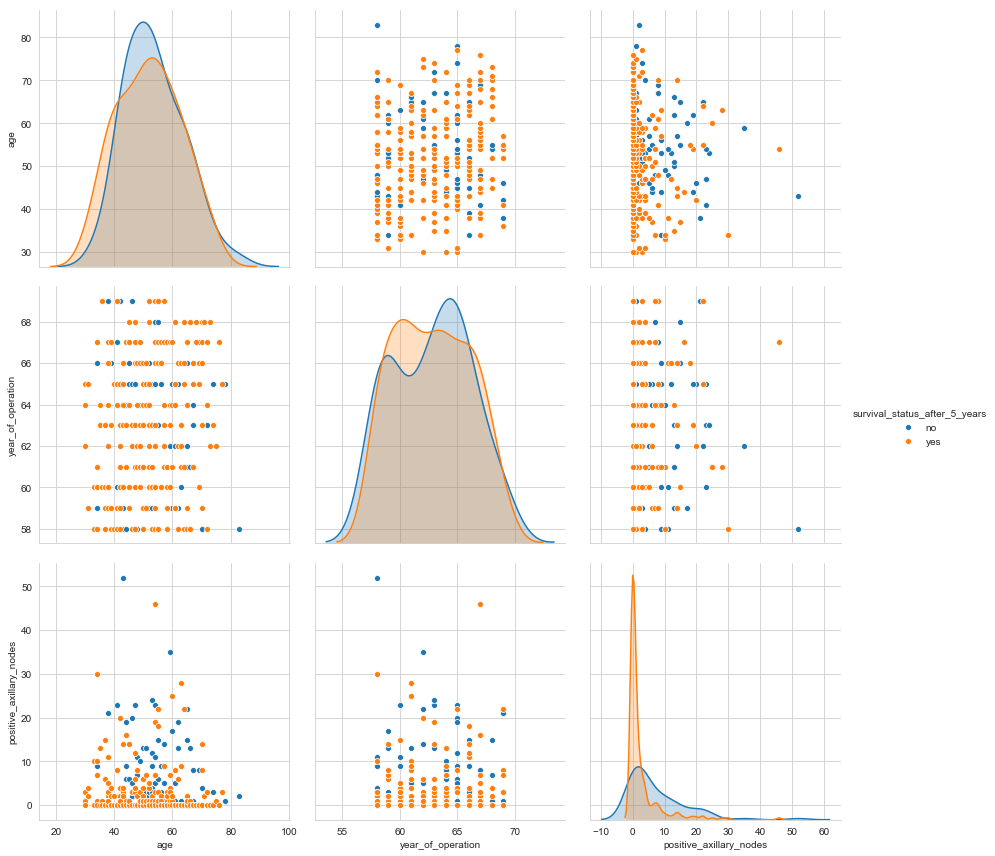

In [68]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(haberman, hue="survival_status_after_5_years", size=4);
#plt.title('pair-plot of survival_status_after_5_years')
plt.show()

Observation:

it seens that patients who have high positive_axillary nodes have less chance of survival after 5 year treatment.

it is very defficult to classified survival status.

patients who survived have mostly 0-5 spread of positive auxillary nodes.

scatter plot between year_of_operation and positive_axillary_nodes makes better seperation.

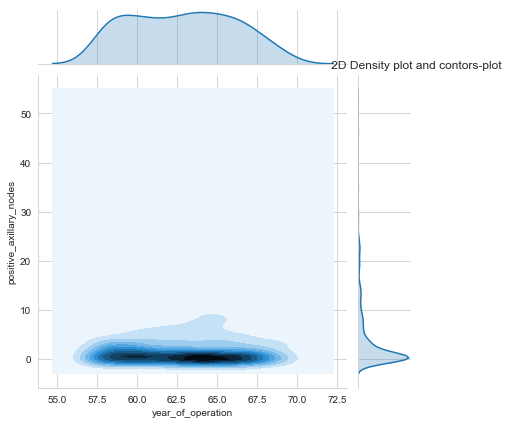

In [64]:
#2D Density plot, contors-plot
sns.jointplot(x="year_of_operation", y="positive_axillary_nodes", data=haberman, kind="kde");
plt.title('                   2D Density plot and contors-plot')
plt.show();

Observation:

scatter plot between year_of_operation and positive_axillary_nodes shows better sense of seperation. but from statistics, most important variable is positive_axillary_nodes and second most important is year_of_operation for seperating between two class.